In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.multiclass import OneVsRestClassifier


In [9]:
wine_df = pd.read_csv('~/code/ArjanAngenent/VinoDine/raw_data/THE_cleaned_data.csv')
wine_df

,Type,Elaborate,ABV,Body,Acidity,Abbuoto,Abouriou,Abrostine,Acolon,Agiorgitiko,...,Cured Meat,Game Meat,Lamb,Pasta,Pork,Poultry,Rich Fish,Shellfish,Veal,Vegetarian
0,Sparkling,Varietal/100%,7.5,Medium-bodied,High,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,Red,Varietal/100%,12.0,Medium-bodied,Medium,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Red,Varietal/100%,12.0,Full-bodied,High,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Red,Assemblage/Bordeaux Red Blend,11.0,Full-bodied,Medium,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
4,Red,Varietal/100%,12.5,Full-bodied,High,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99091,Red,Varietal/100%,12.0,Medium-bodied,High,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
99092,White,Varietal/100%,13.0,Medium-bodied,Medium,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
99093,Dessert,Varietal/100%,13.5,Medium-bodied,High,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
99094,White,Varietal/100%,12.5,Medium-bodied,High,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0


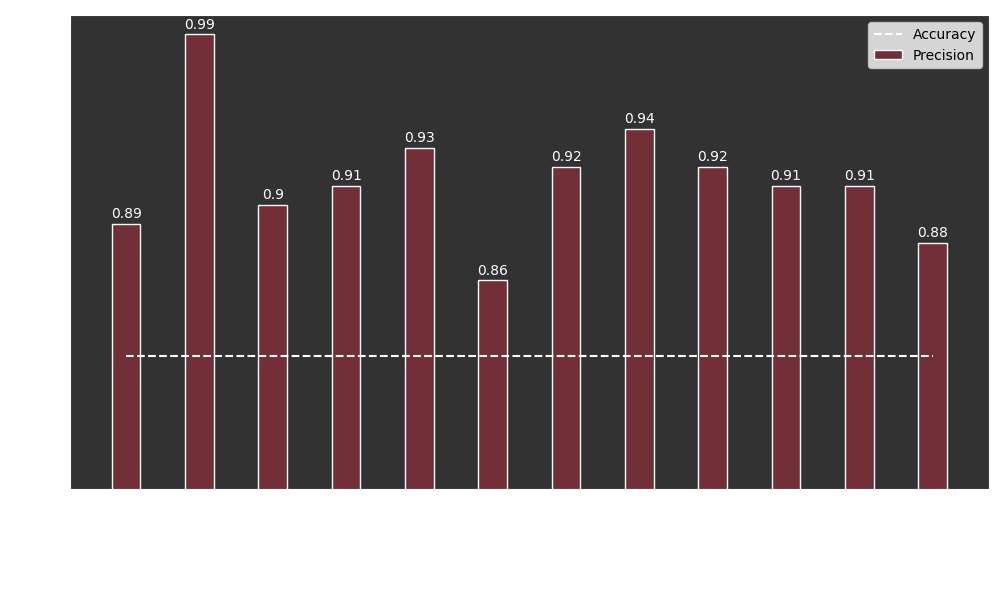

In [114]:
class_labels = ['Appetizer', 'Beef', 'Cured Meat', 'Game Meat', 'Lamb', 'Pasta', 'Pork', 'Poultry', 'Rich Fish', 'Shellfish', 'Veal', 'Vegetarian']
precision = [0.89, 0.99, 0.90, 0.91, 0.93, 0.86, 0.92, 0.94, 0.92, 0.91, 0.91, 0.88]
recall = [0.82, 0.99, 0.92, 0.92, 0.94, 0.79, 0.92, 0.94, 0.90, 0.91, 0.88, 0.90]
f1_score = [0.85, 0.99, 0.91, 0.91, 0.94, 0.82, 0.92, 0.94, 0.91, 0.91, 0.89, 0.89]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

bar_width = 0.39
index = np.arange(len(class_labels))
ax.plot([index[0],index[-1]], [0.82,.82], linestyle='dashed', label='Accuracy', color ='w' )
ax.bar(index, precision, color='#722F37', edgecolor='w', width=bar_width, label='Precision')
ax.bar_label(ax.containers[0], label_type='edge', color='white', padding = 2)
plt.gca().set_facecolor('#323232')

plt.xlabel('Class', color='w')
plt.ylabel('Score', color='w')
plt.xticks(index + 0., class_labels, rotation=45, color = 'w' )
plt.yticks(color='w')
plt.legend(loc='upper right')
plt.tight_layout()
plt.ylim(0.75, 1)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

ax.tick_params(axis='x',color='white')
ax.tick_params(axis='y', color='white')

plt.savefig('Graph_1', transparent=True)
plt.show()
